In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
class Bandit:
    def __init__(self, K, e):
        self.e = e
        self.K = K
        self.total = 0
        self.rewards = np.random.normal(0, 1, (K, ))
        self.records = np.zeros_like(self.rewards)
        self.history = []
        for i in range(K):
            self.records[i] = 0
        self.n = 0
        
    def RewardFn(self, arm):
        if arm == 3:
            return 10.0
        else:
            return -1

    def Pull(self):
        p1 = np.random.uniform(0, 1, 1)[0]
        if p1 < (1-self.e):
            arm = int(np.argmax(self.rewards))
        else:
            p2 = np.random.uniform(0, 1, 1)[0]
            arm = int(np.floor(p2 * 10))

        self.records[arm] += 1
        currReward = self.RewardFn(arm)
        self.total += currReward
        self.history.append(self.total)
        self.rewards[arm] = (self.rewards[arm] * self.n + currReward)/(self.n + 1) 
        self.n += 1

In [107]:
agent = Bandit(10, 0.10)

In [112]:
for i in range(100000):
    agent.Pull()

In [113]:
agent.records

array([  5102.,   5153.,   4979., 454679.,   5133.,   5101.,   4963.,
         4945.,   4985.,   4960.])

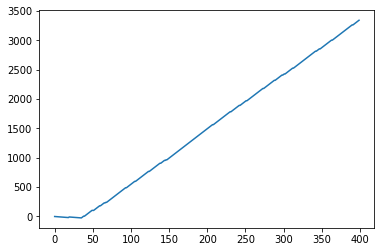

In [114]:
plt.plot(agent.history[:400])